# Ydata Data Science School
## Linear Regression & Regularization Exercise.


## Outline
In this exercise you will learn the following topics:

1. Refresher on how linear regression is solved in batch and in Gradient Descent
2. Implementation of Ridge Regression
3. Comparing Ridge, Lasso and vanila Linear Regression on a dataset

## Refresher on Ordinary Least Square (OLS) aka Linear Regeression

### Lecture Note

In Matrix notation, the matrix $X$ is of dimensions $n \times p$ where each row is an example and each column is a feature dimension.

Similarily, $y$ is of dimension $n \times 1$ and $w$ is of dimensions $p \times 1$.

The model is $\hat{y}=X\cdot w$ where we assume for simplicity that $X$'s first columns equals to 1 (one padding), to account for the bias term.

Our objective is to optimize the loss $L$ defines as resiudal sum of squares (RSS):

$L_{RSS}=\frac{1}{N}\left\Vert Xw-y \right\Vert^2$ (notice that in matrix notation this means summing over all examples, so $L$ is scalar.)

To find the optimal $w$ one needs to derive the loss with respect to $w$.

$\frac{\partial{L_{RSS}}}{\partial{w}}=\frac{2}{N}X^T(Xw-y)$ (to see why, read about [matrix derivatives](http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf) or see class notes )

Thus, the gardient descent solution is $w'=w-\alpha \frac{2}{N}X^T(Xw-y)$.

Solving $\frac{\partial{L_{RSS}}}{\partial{w}}=0$ for $w$ one can also get analytical solution:

$w_{OLS}=(X^TX)^{-1}X^Ty$

The first term, $(X^TX)^{-1}X^T$ is also called the pseudo inverse of $X$.

See [lecture note from Stanford](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) for more details.


## Exercise 1 - Ordinary Least Square
* Get the boston housing dataset https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

* What is $p$? what is $n$ in the above notation? hint: [shape](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.shape.html)

* write a model `OrdinaryLinearRegression` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score` (which returns the MSE on a given sample set). Hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

* Fit the model. What is the training MSE?

* Plot a scatter plot where on x-axis plot $Y$ and in the y-axis $\hat{Y}_{OLS}$

* Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test? Hint: use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).

* Use a t-test to proove that the MSE for training is significantly smaller than for testing. What is the p-value? Hint: use [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html).

* Write a new class `OrdinaryLinearRegressionGradientDescent` which inherits from `OrdinaryLinearRegression` and solves the problem using gradinet descent. The class should get as a parameter the learning rate and number of iteration. Plot the class convergance. What is the effect of learning rate? How would you find number of iteration automatically? Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your features first.

* The following parameters are optional (not mandatory to use):
    * early_stop - True / False boolean to indicate to stop running when loss stops decaying and False to continue.
    * verbose- True/False boolean to turn on / off logging, e.g. print details like iteration number and loss (https://en.wikipedia.org/wiki/Verbose_mode)
    * track_loss - True / False boolean when to save loss results to present later in learning curve graphs

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

In [218]:
# * write a model `Ols` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score`.? hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

class Ols(object):
    def __init__(self):
        self.w = None

    @staticmethod
    def pad(X):
        # Add a column of ones to the feature matrix for the intercept term
        return np.c_[np.ones(X.shape[0]), X]

    def fit(self, X, Y):
        # Remember to pad with 1 before fitting
        if isinstance(Y, np.ndarray) is False:
            Y = np.array(Y).T[0]      
        self._fit(X, Y)

    def _fit(self, X, Y):
        # Calculate the coefficients using the normal equation
        X_padded = self.pad(np.array(X))  
        self.w = np.linalg.pinv(X_padded) @ Y

    def predict(self, X):
        # Return Xw
        return self._predict(X)

    def _predict(self, X):
        # Predict the target variable
        X_padded = self.pad(np.array(X))
        return X_padded @ self.w

    def score(self, X, Y):
        # Return MSE
        if isinstance(Y, np.ndarray) is False:
            Y = np.array(Y).T[0]
        Y_pred = self.predict(X)
        mse = np.mean((Y - Y_pred) ** 2)
        return mse

In [ ]:
# Write a new class OlsGd which solves the problem using gradinet descent.
# The class should get as a parameter the learning rate and number of iteration.
# Plot the loss convergance. for each alpha, learning rate plot the MSE with respect to number of iterations.
# What is the effect of learning rate?
# How would you find number of iteration automatically?
# Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your feature first.
class Normalizer():
  def __init__(self):
    pass

  def fit(self, X):
    pass

  def predict(self, X):
    #apply normalization
    pass

class OlsGd(Ols):

  def __init__(self, learning_rate=.05,
               num_iteration=1000,
               normalize=True,
               early_stop=True,
               verbose=True):

    super(OlsGd, self).__init__()
    self.learning_rate = learning_rate
    self.num_iteration = num_iteration
    self.early_stop = early_stop
    self.normalize = normalize
    self.normalizer = Normalizer()
    self.verbose = verbose

  def _fit(self, X, Y, reset=True, track_loss=True):
    #remeber to normalize the data before starting
    pass

  def _predict(self, X):
    #remeber to normalize the data before starting
    pass

  def _step(self, X, Y):
    # use w update for gradient descent
    pass

In [44]:
def remove_newline_odd(fp, ofp):
    # Open the file and read the content
    with open(fp, 'r') as file:
        lines = file.readlines()

    modified_lines = [line.rstrip('\n') if index % 2 == 0 else line for index, line in enumerate(lines)]
    lines = ''.join(modified_lines)
    s_lines = lines.split('\n')

    f_lines = [','.join(re.split(r'\s+', line[1:])) for line in s_lines]
    
    with open(ofp, 'w') as output_file:
        output_file.write("CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV\n")
        for l in f_lines:
            output_file.write(f"{l}\n")
    

# Specify the file path
file_path = 'boston_n.txt' 
remove_newline_odd('boston_n.txt', 'boston_fin.txt')


In [3]:
df = pd.read_csv('boston_fin.txt')
df.shape

(506, 14)

In [208]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

print(data.shape)

(506, 13)


* What is $p$? what is $n$ in the above notation? hint: [shape](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.shape.html)<br>
p = 14<br>
n = 506

In [166]:
X_train = df.iloc[:,:-1]
y_train = df.iloc[:,-1:]

# Create an instance of Ols
model = Ols()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_train)

# Evaluate the model's performance using MSE
mse = model.score(X_train, y_train)

print(f'Mean Squared Error on the test set: {mse}')

Mean Squared Error on the test set: 22.362700963625556


c:\Users\USER\anaconda3\envs\py4dp\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\py4dp\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


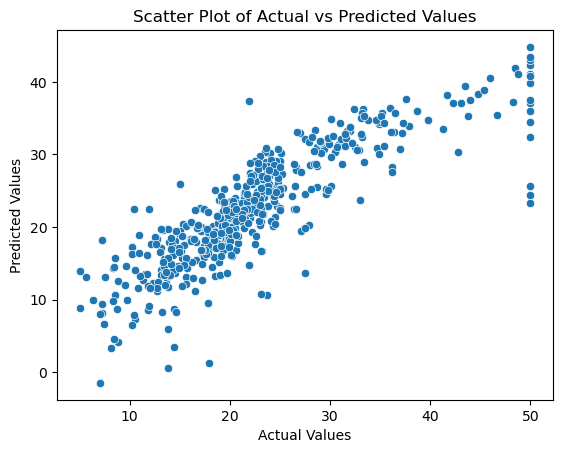

In [116]:
sns.scatterplot(x=np.array(y_train).T[0], y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs Predicted Values")
plt.show()

In [115]:
train_mse = []
test_mse = []
for _ in range(20):
    X_train_n,  X_test, y_train_n, y_test = train_test_split(X_train, y_train, test_size=0.25)
    model_n = Ols()

    # Train the model
    model.fit(X_train_n, y_train_n)

    # Evaluate the model's performance using MSE
    test_mse.append(model.score(X_test, y_test))
    train_mse.append(model.score(X_train_n, y_train_n))

a_train_mse = np.array(train_mse)
a_test_mse = np.array(test_mse)
print(f'Average Train MSE: {a_train_mse.mean()}')
print(f'Average Test MSE: {a_test_mse.mean()}')

Average Train MSE: 21.75601798017897
Average Test MSE: 25.70208103947154


In [117]:
# Use a t-test to proove that the MSE for training is significantly smaller than for testing. What is the p-value? 
stats.ttest_rel(a_train_mse, a_test_mse)

TtestResult(statistic=-2.801963426666516, pvalue=0.0113749082867426, df=19)

p-value = 1.1%, it is sufficiently low, hence we can conclude that the MSE for training is significantly smaller than for testing set

In [205]:
class Normalizer:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        self.mean = X.mean(axis=0)
        self.std = X.std(axis=0)

    def predict(self, X):
        return (X - self.mean) / self.std

class OlsGd(Ols):

    def __init__(self, learning_rate=0.05, num_iterations=1000, normalize=True, early_stop=True, verbose=True):
        super(OlsGd, self).__init__()
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.early_stop = early_stop
        self.normalize = normalize
        self.normalizer = Normalizer()
        self.verbose = verbose
        self.loss_history = []

    def _fit(self, X, Y, reset=True, track_loss=True):
        if reset:
            self.w = None

        if self.normalize:
            self.normalizer.fit(X)
            X = self.normalizer.predict(X)
        
        X_padded = self.pad(np.array(X)) 

        if self.w is None:
            self.w = np.zeros(X_padded.shape[1])

        for i in range(self.num_iterations):
            loss = self._step(X_padded, Y)
            self.loss_history.append(loss)

            if self.verbose and i % 100 == 0:
                print(f'Iteration {i}, Loss: {loss}')

            if self.early_stop and i > 0 and np.abs(self.loss_history[-1] - self.loss_history[-2]) < 1e-5:
                if self.verbose:
                    print(f'Early stopping at iteration {i}')
                break

    def _predict(self, X):
        if self.normalize:
            X = self.normalizer.predict(X)
        return super()._predict(X)

    def _step(self, X, Y):
        self.w = self.w - self.learning_rate * (1/X.shape[0]) * (X @ self.w - Y) @ X
        loss = np.mean((X @ self.w - Y)**2)
        return loss
    
    def plot_convergence(self):
        loss_history = self.loss_history
        plt.plot(range(1, len(loss_history) + 1), loss_history)
        plt.xlabel('Iteration')
        plt.ylabel('Mean Squared Error')
        plt.title('Convergence')
        plt.show()

Iteration 0, Loss: 587.316885329975
Iteration 100, Loss: 94.48048997667955
Iteration 200, Loss: 32.85116991598115
Iteration 300, Loss: 24.225736846618535
Iteration 400, Loss: 22.78543499451052
Iteration 500, Loss: 22.3922524023629
Iteration 600, Loss: 22.19423772694632
Iteration 700, Loss: 22.059349894740016
Iteration 800, Loss: 21.95883579929351
Iteration 900, Loss: 21.88156120681593


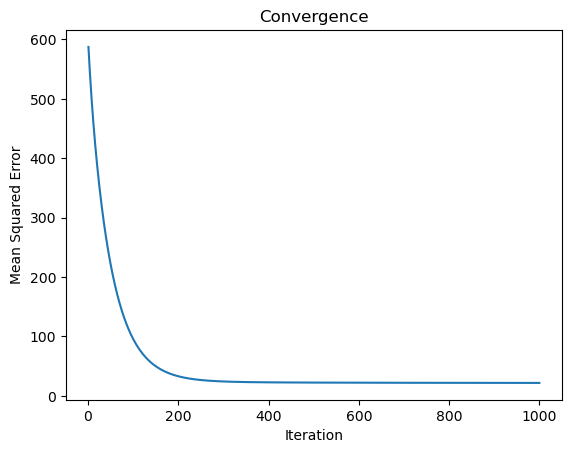

Mean Squared Error on the test set (Gradient Descent): 25.186967933437582


In [207]:
# Create an instance of OrdinaryLinearRegressionGradientDescent
model_gd = OlsGd(learning_rate=0.01, num_iterations=1000)

# Train the model using gradient descent
model_gd.fit(X_train_n, y_train_n)

# Plot the convergence
model_gd.plot_convergence()

# Make predictions on the test set
y_pred_gd = model_gd.predict(X_test)

# Evaluate the model's performance using MSE
mse_gd = model_gd.score(X_test, y_test)

print(f'Mean Squared Error on the test set (Gradient Descent): {mse_gd}')

## Exercise 2 - Ridge Linear Regression

Recall that ridge regression is identical to OLS but with a L2 penalty over the weights:

$L(y,\hat{y})=\sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2$

where $y^{(i)}$ is the **true** value and $\hat{y}^{(i)}$ is the **predicted** value of the $i_{th}$ example, and $N$ is the number of examples

* Show, by differentiating the above loss, that the analytical solution is $w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$
* Change `OrdinaryLinearRegression` and `OrdinaryLinearRegressionGradientDescent` classes to work also for ridge regression. Either add a parameter, or use inheritance.
* **Bonus: Noise as a regularizer**: Show that OLS (ordinary least square), if one adds multiplicative noise to the features the **average** solution for $W$ is equivalent to Ridge regression. In other words, if $X'= X*G$ where $G$ is an uncorrelated noise with variance $\sigma$ and mean 1, then solving for $X'$ with OLS is like solving Ridge for $X$. What is the interpretation?



In [ ]:
class RidgeLs(Ols):
  def __init__(self, ridge_lambda, *wargs, **kwargs):
    super(RidgeLs,self).__init__(*wargs, **kwargs)
    self.ridge_lambda = ridge_lambda

  def _fit(self, X, Y):
    #Closed form of ridge regression
    pass

### Use scikitlearn implementation for OLS, Ridge and Lasso